### Solution 1. 

C:\Users\Natisha\AppData\Local\Temp\ipykernel_6796\3717032475.py:46: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Gamma,ax=density,hist=False, color="orangered")
C:\Users\Natisha\AppData\Local\Temp\ipykernel_6796\3717032475.py:46: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

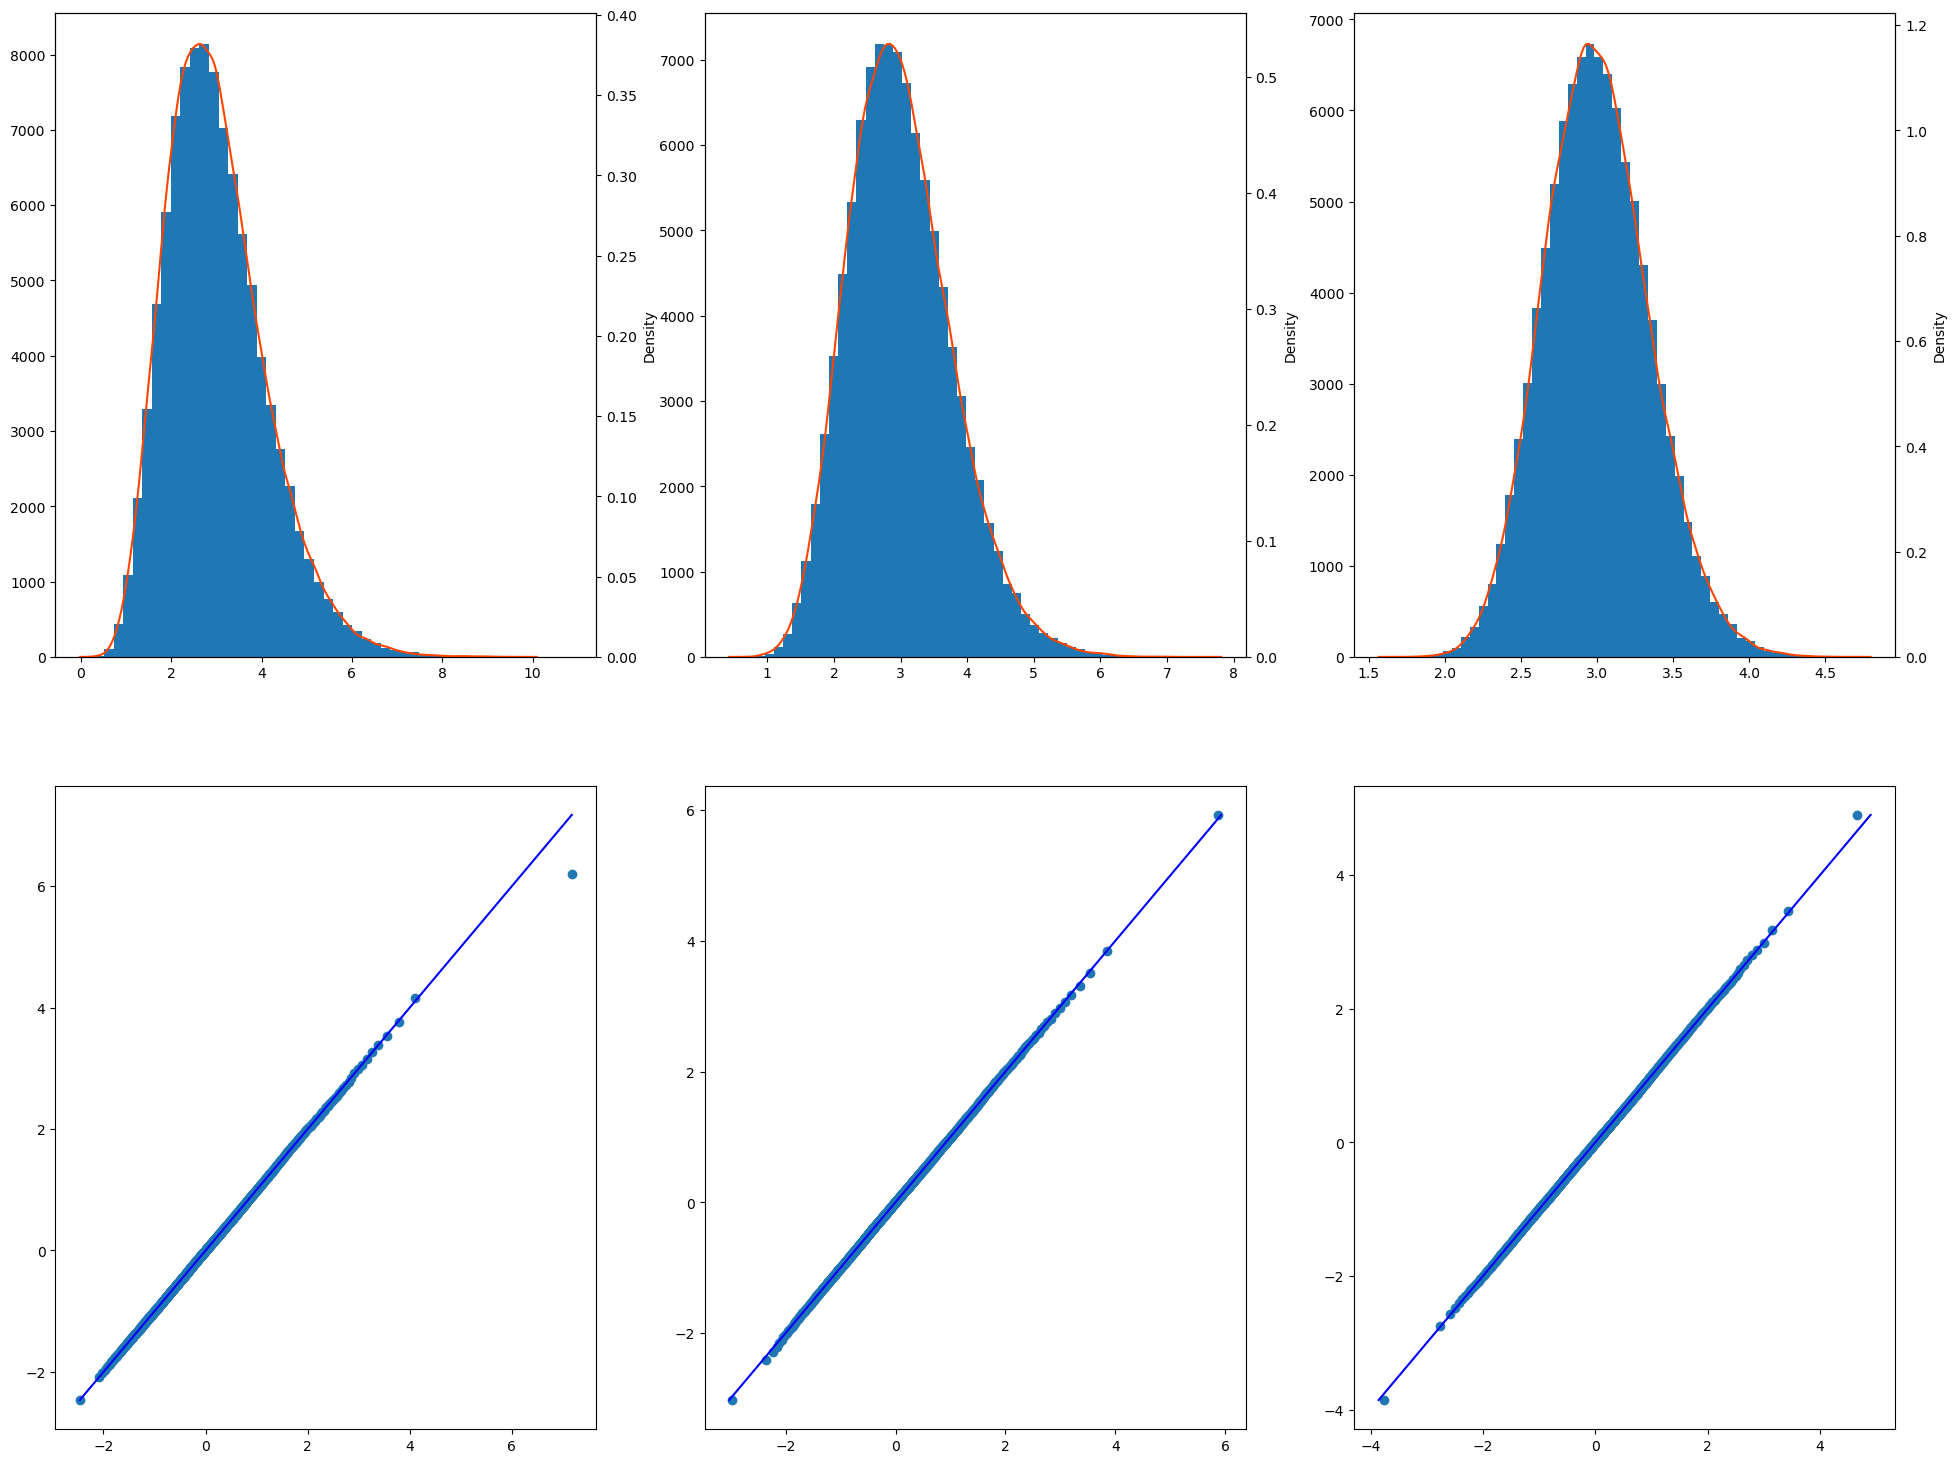

In [21]:
from scipy.stats import gamma,probplot,norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
figure_1, ax_1 = plt.subplots(2, 3)
plt.subplots_adjust(bottom=0.05, right=3, top=3)
N = [5, 10, 50]
k=3
size = 100000
Index=0

def standardize(observation):
  z = (observation-np.mean(observation))/np.std(observation)
  return z

def get_quantiles(data):
    quantiles = []
    for q in np.arange(0, 1.001, 0.001):
        quantiles.append(np.quantile(data, q))
    return quantiles


def pyqqplot(data1, data2):
    data1 = standardize(data1)
    data2 = standardize(data2)
    q1 = np.array(get_quantiles(data1))
    q2 = np.array(get_quantiles(data2))

    minim = min(data1.min(), data2.min())
    maxim = max(data1.max(), data2.max())
    return q1,q2, minim, maxim


for n in N:
  sample_array=[]*size
  sample_average_array=[]
  for i in range(0,size):
    sample_array.append(np.random.chisquare(k, n))
    sample_average_array.append(np.average(sample_array[i]))
  ax_1[0][Index].hist(sample_average_array,bins=50)
  shape = (n*k)/2
  scale = 2/n
  Gamma = gamma.rvs(shape,scale=scale,size=100000)
  density=ax_1[0][Index].twinx()
  sns.distplot(Gamma,ax=density,hist=False, color="orangered")
  q1_0, q2_0, minim0, maxim0 = pyqqplot(np.sort(sample_average_array),Gamma)
  ax_1[1][Index].scatter(q1_0, q2_0);
  ax_1[1][Index].plot([minim0, maxim0], [minim0, maxim0], 'blue');
  Index+=1





### Solution 2.

C:\Users\Natisha\AppData\Local\Temp\ipykernel_6796\480679200.py:43: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(norm_dist,ax=twin,hist=False, color="orangered")
C:\Users\Natisha\AppData\Local\Temp\ipykernel_6796\480679200.py:43: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n

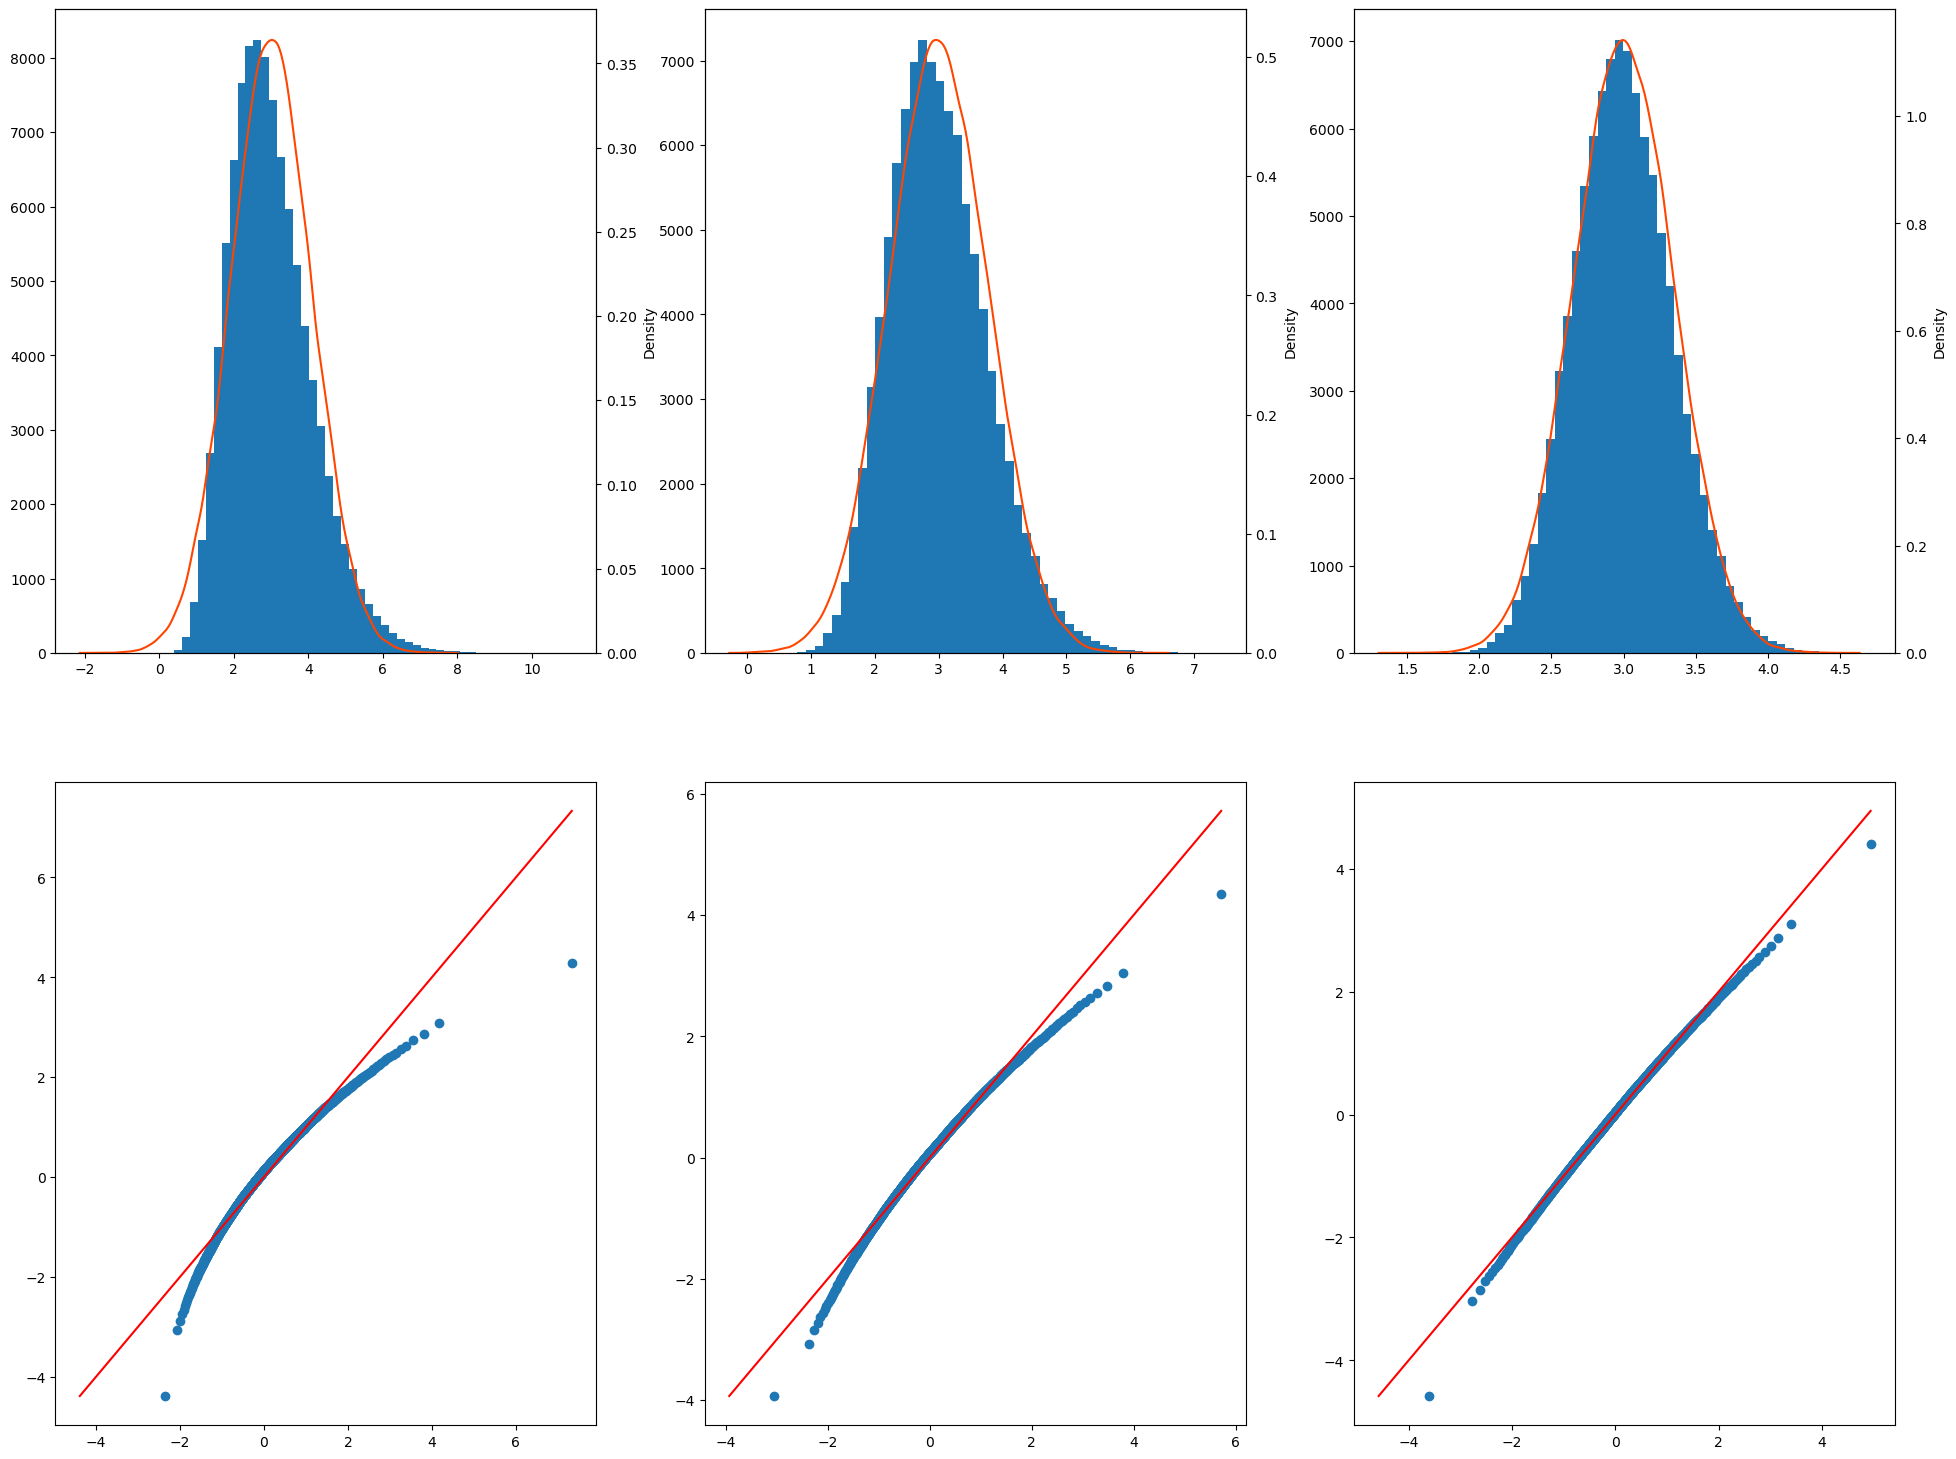

In [22]:
from scipy.stats import gamma,probplot,norm
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
figure_2, ax_2 = plt.subplots(2, 3)
plt.subplots_adjust(bottom=0.05, right=3, top=3)
N = [5, 10, 50]
k=3
size = 100000
Index=0
def standardize(observation):
  z = (observation-np.mean(observation))/np.std(observation)
  return z

def get_quantiles(data):
    quantiles = []
    for q in np.arange(0, 1.001, 0.001):
        quantiles.append(np.quantile(data, q))
    return quantiles


def pyqqplot(data1, data2):
    data1 = standardize(data1)
    data2 = standardize(data2)
    q1 = np.array(get_quantiles(data1))
    q2 = np.array(get_quantiles(data2))

    minim = min(data1.min(), data2.min())
    maxim = max(data1.max(), data2.max())
    return q1,q2, minim, maxim


for n in N:
  sample_array=[]*size
  sample_average_array=[]
  for i in range(0,size):
    sample_array.append(np.random.chisquare(k, n))
    sample_average_array.append(np.average(sample_array[i]))
  ax_2[0][Index].hist(sample_average_array,bins=50)
  twin=ax_2[0][Index].twinx()
  norm_dist=norm.rvs(loc=k, scale=np.sqrt( (2*k)/n), size=size)
  sns.distplot(norm_dist,ax=twin,hist=False, color="orangered")
  q1_0, q2_0, minim0, maxim0 =   pyqqplot(np.sort(sample_average_array),norm_dist)
  ax_2[1][Index].scatter(q1_0, q2_0);
  ax_2[1][Index].plot([minim0, maxim0], [minim0, maxim0], 'r-');
  Index+=1



### Solution 3.

#### Binomial Probability

##### The probability under H0 (Null Hypothesis) of having observed 20 cases

In [23]:
from scipy.stats import binom
binom.pmf(k=20, n=120, p=0.1)

0.007825579711977095

#### Since the value of the Null Hypothesis is 0.0078 which is insignficant. This hypothesis will be rejected as it is lower than 0.05

#### Probability for (1-19)

##### The probability under H0 of having observed an outcome at least as extreme as 20 cases

In [24]:
prob = 0
for i in range(19):
  prob += binom.pmf(k=i+1, n=120, p=0.1)

prob = 1-prob
prob

0.015770001206392048

##### This will also be rejected as the H0 is insignficant & lower than 0.05

##### Since in both cases we have rejected the Hypothesis, it can be concluded that there is no epidemic amongst the children ie. they are COVID- NEGATIVE. 

#### Observed & Theoretical Mean where sample size is 9000


In [25]:
n, pval = 30, 0.1
mean, var, skew, kurt = binom.stats(n, pval, moments='mvsk')

In [26]:
from numpy import random
new_array = random.binomial(n=30, p=0.1, size=9000)

In [27]:
np.mean(new_array)
from scipy import stats

z_score = (mean - (np.mean(new_array)))/(var**0.5)
z_score


-0.003786723854356647

In [28]:
pval = stats.norm.sf(z_score)
print('The p value is : ')
print(pval)

The p value is : 
0.5015106806393619


#### This will be accepted because as the sample size increases the chances of error reduces. 

#### In Null Hypothesis there are always factors which are beyond our control like in our case the immunity / diet patterns of children, maybe the children who were selected in the small scale trial had stronger immunities & better diet patterns and those factors yielded the values where the hypothesis was rejected and it was concluded that there isn't an epidemic. 

##### Whereas when our sample size got increased from 120 to 9000, there are less chances of error to be able to reject the hypothesis and also the P value computed increased from 0.1 (which was the previous value), so we cannot reject the hypothesis and conclude that there the children are COVID POSITIVE. 